<a href="https://colab.research.google.com/github/ewakobrzynska/MachineLearning/blob/main/047Clustering_Exercises_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

We have prepared five exercises in this chapter:

1. Modify the HCM code to work for three groups. This exercise can be divded into four tasks:
    - modify the parameters,
    - modify the calculate_u function,
    - execute the clustering,
    - plot the results.
2. For density clustering, plot the feature space with all element marked with different color, depending on the cluster that it's assigned to. You should do the following tasks:
    - fill the get_color method,
    - fill the plot code.
3. Build a method that plot baed on dendrograms_history and pydot, a dendrogram for the divisive clustering method. You should base on agglomerative method, but keep in mind that it works top-down instead of bottom-up. This exercise need just one function to be implemented:
    - show_tree_divisive.
    You should loop over the dendrogram_history variable and loop over childs.
4. Implement the $s_{2}$ metric   
5. Draw the borders between clusters in the output image (for 5.0 grade)

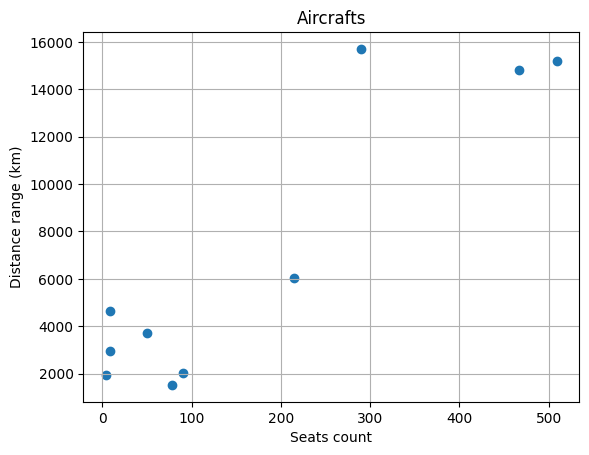

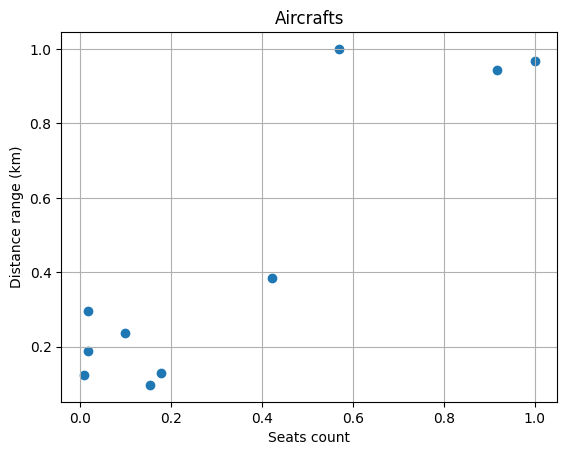

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
#plt.show()

train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

pd.DataFrame(X_norm, columns = ['Seats count','Distance range (km)'])

x1 = np.array(X_norm[:,0])
x2 = np.array(X_norm[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
#plt.show()

data_set = X_norm

## Libraries

To solve the exercises, we need the following libraries to load in the first place.


In [17]:
import numpy
import random
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.image as img
from PIL import Image

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image

## Exercise 1: Modify the HCM code to work for three groups

The obvious part is the variable ```groups```, but the most changes needs to be done here:

In [18]:
#%store -r data_set

### change here:
groups = 3

error_margin = 0.01
m=2
assignation=np.zeros((len(data_set),groups))

centers = np.array([[0.01229673, 0.25183492],
       [0.3689626 , 0.61904127],
       [0.95732769, 0.45059586]])

centers = np.array([[0.01229673, 0.25183492],
       [0.3689626 , 0.61904127],
       [0.95732769, 0.45059586]])

def calculate_distance(x,v):
    #return sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)
    return sqrt(sum((x_i - v_i) ** 2 for x_i, v_i in zip(x, v)))


def calculate_new_centers(u):
    new_centers = []
    for c in range(groups):
        u_x_vector = np.zeros(len(data_set[0]))
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar += u[i][c] ** m
            u_x_vector += np.multiply(u[i][c] ** m, data_set[i])
        u_scalar += np.finfo(float).eps
        new_centers.append(np.divide(u_x_vector, u_scalar))
    return new_centers

def calculate_differences(new_assignation, assignation):
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

def cluster_hcm(assignation,centers):
    difference_limit_not_achieved=True
    new_centers = centers
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u_three(data_set[i]))
        new_centers = calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation, assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1
    return new_assignation, new_centers

### Modify the ``calculate_u`` function

Fill the gap below to make the function working for more groups than two. The goal here is to calculate the distance between ``x`` and the center of a given group and append the value to ``minimal_distance``.

In [19]:
def calculate_u_three(x):
    u_array = np.zeros(groups)
    minimal_distance = []
    for group in range(groups):
        # fill the gap (1 line of code)
        distance_to_group = calculate_distance(x, centers[group])
        minimal_distance.append(distance_to_group)
    min_group_id = np.argmin(minimal_distance)
    u_array[min_group_id] = 1
    return u_array

### Execute the clustering

As in the previous example we need to cluster it.

In [20]:
new_assignation_hcm3, new_centers_hcm3 = cluster_hcm(assignation, centers)
pd.DataFrame(new_centers_hcm3)

,0,1
0,0.078585,0.178323
1,0.496071,0.692516
2,0.958743,0.955892


### Plot the results

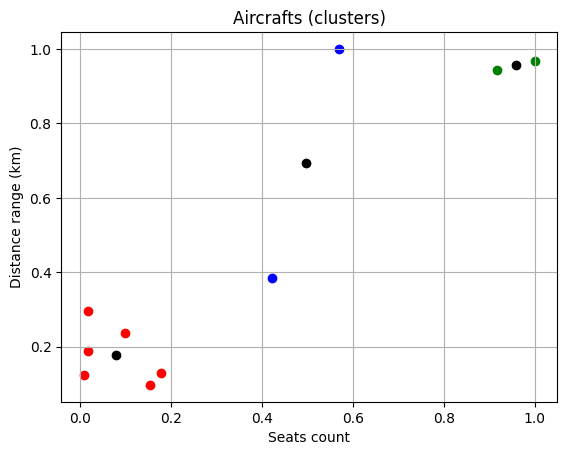

In [21]:
red = data_set[np.where(np.array(new_assignation_hcm3)[:,0]==1)]
blue = data_set[np.where(np.array(new_assignation_hcm3)[:,1]==1)]
green = data_set[np.where(np.array(new_assignation_hcm3)[:,2]==1)]

fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(green[:,0],green[:,1],c='green')
ax.scatter(np.array(new_centers_hcm3)[:,0],np.array(new_centers_hcm3)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

## Exercise 2: Plot the density clusters

Use the code below to plot the results. You can play with the max_distance variable to get more or less groups.

In [26]:
#%store -r new_assignation_density
#%store -r data_set

assignation = np.zeros(len(data_set))
distance_matrix = np.zeros((len(data_set), len(data_set)))
max_distance = 0.25
number_of_cluster = 0
min_points = 2

def calculate_distance(x,v):
    return sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)

def calculate_distance_matrix():
    distance_matrix = np.zeros((len(data_set),len(data_set)))
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = calculate_distance(data_set[i], data_set[j])
    return distance_matrix

def get_closest_elements(distance_matrix, element_id):
    element_distances = distance_matrix[element_id]
    filtered = {}
    iter = 0
    for element in element_distances:
        if element < max_distance:
            filtered[iter] = element
        iter = iter + 1
    return filtered

def set_as_noise(assignation,element_id):
    assignation[element_id] = -1
    return assignation

def set_visited(elements, assignation, number_of_clusters):
    for element_id in elements.keys():
        assignation[element_id] = number_of_clusters
    return assignation

def cluster_density(assignation):
    number_of_cluster = 0
    distance_matrix = calculate_distance_matrix()
    element_ids = list(range(len(data_set)))
    random.shuffle(element_ids)
    for i in element_ids:
        if assignation[i] != 0:
            continue
        closest = get_closest_elements(distance_matrix, i)
        if len(closest) < min_points:
            assignation = set_as_noise(assignation,i)
        else:
            assignation = set_visited(closest, assignation, number_of_cluster)
            number_of_cluster = number_of_cluster + 1
    return assignation

new_assignation_density = cluster_density(assignation)

### Fill the ``get_group_objects`` method

Only one line needs to be updated. The ``get_group_objects`` function should return the objects of a given group.

In [37]:
colors = ['red','blue','green','orange','black','yellow']

def get_group_objects(color_id):
  return data_set[np.where(new_assignation_density == color_id)]



### Fill the plot code

If done properly the code below should return a plot of two clusters and the noise.

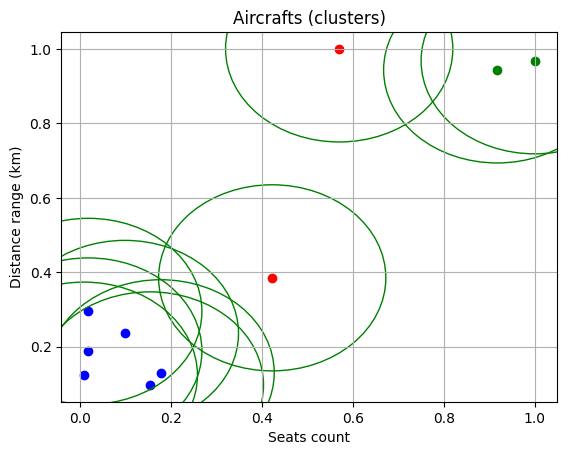

In [38]:
colors = ['red','blue','green','orange','black','yellow']

fig, ax = plt.subplots()

assigned_groups = new_assignation_density
for group in np.unique(assigned_groups):
    small_set = get_group_objects(group)
    ax.scatter(small_set[:,0], small_set[:,1], c=colors.pop(0))
    for circle in small_set:
        circle1 = plt.Circle((circle[0], circle[1]), 0.25, color='green', fill=False)
        ax.add_artist(circle1)

ax.set(xlabel='Seats count', ylabel='Distance range (km)',title='Aircrafts (clusters)')
ax.grid()
plt.show()

## Exercise 3: Build a dendrogram using dendrograms_history and pydot (done)

In this exercise we gonna use the variable dendrograms_history and pydot. Below we restore the variable and initialize the dendrogram graph.

In [44]:
#%store -r dendrogram_hist_diana

distance_matrix = np.zeros((len(data_set), len(data_set)))
current_dendrograms = []

for iter in range(len(data_set)):
    current_dendrograms.append(data_set[iter])

import pydot
import math

tree = pydot.Dot(graph_type='graph')

def merge_elements(current_dendrograms, merged_list, i):
    if isinstance(current_dendrograms[i][0], type(np.array([]))):
        for iter in range(len(current_dendrograms[i])):
            merged_list.append(current_dendrograms[i][iter])
    else:
        merged_list.append(current_dendrograms[i])
    return merged_list

def set_current_dendrogram(current_dendrograms, dendrograms_hist, i, j):
    elements = []
    hist = []
    current_hist = dendrograms_hist[-1]
    for iter in range(len(current_dendrograms)):
        if iter != i and iter !=j:
            elements.append(current_dendrograms[iter])
            hist.append(current_hist[iter])
    merged_elements = []
    merged_elements = merge_elements(current_dendrograms, merged_elements, i)
    merged_elements = merge_elements(current_dendrograms, merged_elements, j)
    elements.append(merged_elements)
    hist.append([current_hist[i],current_hist[j]])
    dendrograms_hist.append(hist)
    current_dendrograms = elements
    return current_dendrograms, dendrograms_hist

def calculate_dendogram_distance_matrix(current_dendrograms, distance_matrix):
    distance_matrix = np.zeros((len(current_dendrograms), len(current_dendrograms)))
    for i in range(len(current_dendrograms)):
        for j in range(len(current_dendrograms)):
            distance_matrix[i, j] = calculate_distance(calculate_centroid(current_dendrograms[i]),calculate_centroid(current_dendrograms[j]))
    return distance_matrix

def calculate_centroid(dendrogram_elements):
    if type(dendrogram_elements) is list:
        sumof=np.zeros(len(dendrogram_elements[0]))
        for iter in range(len(dendrogram_elements)):
            sumof=np.add(sumof,np.array(dendrogram_elements[iter]))
        if sumof.shape == (len(data_set[0]),len(data_set[0])):
            pass
        return np.divide(sumof*1.0, len(dendrogram_elements)*1.0)
    else:
        return dendrogram_elements

def get_lowest_from_distance_matrix(distance_matrix):
    lowest_indexes = [0,1]
    lowest_value = distance_matrix[0,1]
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix)):
            if i != j:
                if lowest_value > distance_matrix[i,j]:
                    lowest_value = distance_matrix[i,j]
                    lowest_indexes = [i,j]
    return lowest_indexes

def cluster_agg(current_dendrograms, distance_matrix):
    dendrograms_hist = [list(range(len(data_set)))]
    for iter in range(len(current_dendrograms)-1):
        distance_matrix = calculate_dendogram_distance_matrix(current_dendrograms, distance_matrix)
        [i, j] = get_lowest_from_distance_matrix(distance_matrix)
        current_dendrograms, dendrograms_hist = set_current_dendrogram(current_dendrograms, dendrograms_hist, i, j)
    return dendrograms_hist

dendrogram_hist_agg = cluster_agg(current_dendrograms, distance_matrix)


def add_edge(level, acesor):
    if acesor != level:
        new_edge = pydot.Edge(str(acesor), str(level))
        tree.add_edge(new_edge)
    if isinstance(level,list):
        add_edge(level[0],level)
        add_edge(level[1],level)

def show_tree_agg():
    current_list = dendrogram_hist_agg.pop()
    root = current_list.pop()
    add_edge(root,root)
    tree.write('tree_agg.png',format='png')

tree = pydot.Dot(graph_type='graph')

def calculate_dendogram_distance_matrix_diana():
    distance_matrix=np.zeros((len(data_set), len(data_set)))
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = calculate_distance(calculate_centroid(data_set[i]),calculate_centroid(data_set[j]))
    return distance_matrix

def choose_cluster(current_level, distance_matrix):
    if type(current_level[0]) != list:
        both_idx = np.array(current_level)
        current = distance_matrix[both_idx[:,None], both_idx]
        diff = np.sum(current) / (current.shape[0] * current.shape[1] - len(current))
        return current_level, diff, 0
    highest_diff = 0
    cluster_id = 0
    for i in range(len(current_level)):
        both_idx = np.array(current_level[i])
        current = distance_matrix[both_idx[:, None], both_idx]
        diff = np.sum(current) / (current.shape[0] * current.shape[1]-len(current))
        if diff > highest_diff:
            highest_diff = diff
            cluster_id = i
    return current_level[cluster_id], highest_diff, cluster_id

def split(split_cluster, distance_matrix, diff):
    if len(split_cluster) == 2:
        cluster1 = [split_cluster[0]]
        cluster2 = [split_cluster[1]]
        return cluster1, cluster2
    split_threshold = diff
    both_idx = np.array(split_cluster)
    distances = distance_matrix[both_idx[:, None], both_idx]
    c1keys, c1counts = np.unique(np.argwhere(distances > split_threshold), return_counts=True)
    c2keys, c2counts = np.unique(np.argwhere(distances <= split_threshold), return_counts=True)
    cluster1_counts = dict(zip(np.array(split_cluster)[c1keys], c1counts))
    cluster2_counts = dict(zip(np.array(split_cluster)[c2keys], c2counts))
    cluster1 = []
    cluster2 = []
    choice = 0
    for item in split_cluster:
        if item not in cluster1_counts.keys():
            cluster2.append(item)
            continue
        if item not in cluster2_counts.keys():
            cluster1.append(item)
            continue
        if cluster1_counts[item] < cluster2_counts[item]:
            cluster2.append(item)
        elif cluster1_counts[item] > cluster2_counts[item]:
            cluster1.append(item)
        else:
            if choice == 0:
                cluster2.append(item)
                choice = 1
            else:
                cluster1.append(item)
                choice = 0
    return cluster1, cluster2

def cluster():
    dendrograms_history=[]
    current_dendrograms=[list(range(len(data_set)))]
    distance_matrix = calculate_dendogram_distance_matrix_diana()
    while len(current_dendrograms) != len(data_set):
        current_level = current_dendrograms[-1]
        current_cluster, diff, cluster_id = choose_cluster(current_level, distance_matrix)
        cluster1, cluster2 = split(current_cluster, distance_matrix, diff)
        if type(current_level[0]) != list:
            current_dendrograms.append([cluster1, cluster2])
        else:
            rest = current_level.copy()
            rest.pop(cluster_id)
            rest.append(cluster1)
            rest.append(cluster2)
            current_dendrograms.append(rest)
        hist = [{"acesor": current_cluster, "childs": [cluster1,cluster2]}]
        dendrograms_history.append(hist)
    return dendrograms_history

dendrogram_hist_diana = cluster()

def show_tree_divisive():
    for item in dendrogram_hist_diana:
        for child in item[0]["childs"]:
            new_edge = pydot.Edge(str(item[0]["acesor"]),str(child))
            tree.add_edge(new_edge)
    tree.write('tree_diana.png',format='png')

<ipython-input-44-f20b43909c02>:113: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.sum(current) / (current.shape[0] * current.shape[1]-len(current))


### Fill ``show_tree_divisive`` function

The function show_tree_divisive goes through each child node and build and edge between.

In [47]:
def show_tree_divisive():
    for item in dendrogram_hist_diana:
        for child in item[0]["childs"]:
            new_edge = pydot.Edge(str(item[0]["acesor"]), str(child))
            tree.add_edge(new_edge)
    tree.write('tree_diana.png', format='png')


show_tree_divisive()


Take a look if you did it properly:

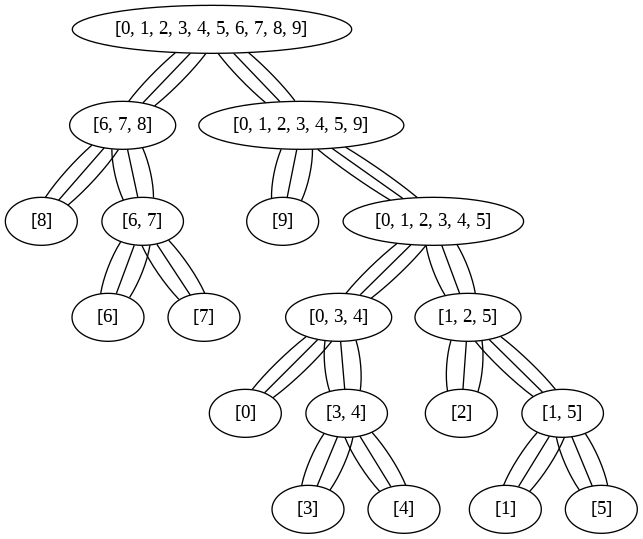

In [48]:
from IPython.display import Image
Image(filename='tree_diana.png')

## Exercise 4: Implement the $s_{2}$ metric

The $s_{2}$ metric gives a better understanding of the distances between centers.

\begin{equation}
 s_{2}(c_{i},c_{j})=d(c_{i},c_{j}).
\end{equation}

Let's restore the centers from HCM grouped by two and initialize the values for three groups as below.

In [52]:
#%store -r new_centers_hcm
def calculate_u(x, centers):
    if calculate_distance(x, centers[0]) < calculate_distance(x, centers[1]):
        return [1,0]
    else:
        return [0,1]

def calculate_new_centers(u):
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    return new_centers

def calculate_differences(new_assignation, assignation):
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

def cluster_hcm(assignation,centers):
    difference_limit_not_achieved=True
    new_centers = centers
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u(data_set[i], new_centers))
        new_centers = calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation, assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1
    return new_assignation, new_centers

new_assignation_hcm, new_centers_hcm = cluster_hcm(assignation, centers)

new_centers_hcm = np.array(new_centers_hcm)
new_centers_hcm3 = np.array([[0.42239686, 0.38503185],[0.07858546, 0.17832272],[0.82907662, 0.97059448]])

IndexError: list index out of range

Measure the distance between each center.

In [ ]:
def calculate_s_2(centers):
    s2 = []
    for center_1 in range(len(centers)):
        for center_2 in range(len(centers)):
            # fill the code here (3 lines)
    return s2

## Exercise 5: Modify the output image with borders between clusters

We use the ``Segmentation`` class as in previous example.

In [ ]:
class Segmentation:

    def __init__(self, feature_matrix, groups):
        self.__data_set = feature_matrix
        self.__groups = groups
        self.__space=[[0, 255], [0, 255], [0, 255]]
        self.__error_margin = 0.5
        self.assignation = np.zeros((len(self.__data_set), self.__groups))
        self.centers = []
        self.select_centers()

    def select_centers(self):
        if len(self.centers) == 0:
            iter=0
            while iter<self.__groups:
                self.centers.append(((random.randrange(0, 255)*1.0/255),
                                     (random.randrange(0, 255)*1.0/255),
                                     (random.randrange(0, 255)*1.0/255)))
                iter=iter+1

    def calculate_distance(self, x, v):
        return sqrt((x[0]-v[0])**2+(x[1]-v[1])**2+(x[2]-v[2])**2)

    def calculate_u(self, x, i):
        smallest_distance = float(self.calculate_distance(x, self.centers[0]))
        smallest_id = 0
        for i in range(1, self.__groups):
            distance = self.calculate_distance(x, self.centers[i])
            if distance < smallest_distance:
                smallest_id = i
                smallest_distance = distance
        distance = np.zeros(self.__groups)
        distance[smallest_id]=1
        return distance

    def calculate_new_centers(self, u):
        new_centers=[]
        for c in range(self.__groups):
            u_x_vector = np.zeros(len(self.centers[0]))
            u_scalar = 0
            for i in range(len(u)):
                u_scalar = u_scalar + u[i][c]
                u_x_vector = np.add(u_x_vector, np.multiply(u[i][c], self.__data_set[i]))
            new_centers.append(np.divide(u_x_vector,u_scalar))
        self.centers = new_centers

    def calculate_differences(self,new_assignation):
        diff=0
        for i in range(len(self.assignation)):
            for j in range(self.__groups):
                diff = diff + abs(float(new_assignation[i][j]) - float(self.assignation[i][j]))
        return diff

    def do_segmentation(self):
        difference_limit_not_achieved = True
        iter = 0
        while difference_limit_not_achieved:
            new_assignation = []
            for i in range(len(self.__data_set)):
                new_assignation.append(self.calculate_u(self.__data_set[i], iter))
            self.calculate_new_centers(new_assignation)

            if iter > 0:
                if self.calculate_differences(new_assignation) < self.__error_margin:
                    difference_limit_not_achieved=False
            self.assignation = new_assignation
            iter = iter + 1

    def get_results(self):
        return self.centers, self.assignation

### Change ``save_image`` method

Add an if statement in the code below. It should consider the change of ``current_pixel`` variable. Please keep in mind that there should be three states considered.

In [ ]:
class ImageConversion:

    def get_image_from_url(self, img_url):
        image = open(img_url,'rb')
        return img.imread(image)

    def get_unique_colours(self, image_matrix):
        feature_matrix = []
        for i in range(len(image_matrix)):
            for j in range(len(image_matrix[0])):
                feature_matrix.append(image_matrix[i, j])
        feature_matrix_np = np.array(feature_matrix)
        uniques, index = np.unique([str(i) for i in feature_matrix_np], return_index=True)
        return feature_matrix_np[index], feature_matrix

    def save_image(self, size, pixel_matrix, unique_matrix, assignation_matrix, colours, output):
        image_out = Image.new("RGB", size)
        pixels = []
        current_pixel = None ## added
        for i in range(len(pixel_matrix)):
            pixel_list = pixel_matrix[i].tolist()
            for j in range(len(unique_matrix)):
                if (pixel_list == unique_matrix[j].tolist()):
                    for k in range(len(colours)):
                        if assignation_matrix[j][k] == 1:
                            segmented_colours = [int(i) for i in (colours[k] * 255)]
                            # fill here (about 6-7 lines)
        image_out.putdata(pixels)
        image_out.save(output)

    def do_segmentation(self):
        difference_limit_not_achieved = True
        iter = 0
        while difference_limit_not_achieved:
            new_assignation = []
            for i in range(len(self.__data_set)):
                new_assignation.append(self.calculate_u(self.__data_set[i], iter))
            self.calculate_new_centers(new_assignation)
            if iter > 0:
                if self.calculate_differences(new_assignation) < self.__error_margin:
                    difference_limit_not_achieved=False
            self.assignation = new_assignation
            iter = iter + 1

    def get_results(self):
        return self.centers, self.assignation

Execute segmentation without any changes:

In [ ]:
image_to_segment = "images/logo_krakow.png"
image_converter = ImageConversion()
image_data = image_converter.get_image_from_url(image_to_segment)
unique_image_data, image_data_list = image_converter.get_unique_colours(image_data)

groups = 3

segmentation = Segmentation(unique_image_data, groups)
segmentation.do_segmentation()
centers, assignation_matrix = segmentation.get_results()

image_size = (232, 258)
image_converter.save_image(image_size, image_data_list, unique_image_data, assignation_matrix, centers, "images/segmented.png")

The image should have black broders between one and the other segment.

In [ ]:
from IPython.display import Image
Image("images/segmented.png")